## Generella anteckningar

### Decorator:
- ger en extra funktion till vår metod, den blir en property (Python behandlar den lite annorlunda)
- ger en getter och en setter
    - getter plockar värdet som vi har gett och ger det vidare till en setter
    - har vi endast en getter så gör det att vi inte kan ändra värdet på metoden i klassen
### Instance:
- Det som vi skapar efter alla metoder och klassen har skapats
- går igenom metod i klassen
- när vi kör en __init__ så kan vi instaciera något
- "self._" och vi vill gömna något

## OOP polymorphism

In [2]:
# example with Python built-in
# example of Polymorphic behavior
print(f"{len([1,23,4])=}")
print(f"{len('1234')=}")

NameError: name 'UnitUS' is not defined

In [ ]:
class Fish:
    def __init__(self, name) -> None:
        self.name = name
    
    def __str__(self):
        return f"I am a fish with name {self.name}"

    def __repr__(self) -> str:
        return f"Fish(name='{self.name}')"

    def speak(self):
        print("Bluppy bluppy")

class Fox:
    def __init__(self, name) -> None:
        self.name = name
    
    def __str__(self) -> str:
        return f"I am a fox with name {self.name}, my sound is mysterious"

    def speak(self):
        return NotImplemented

In [ ]:


fish1 = Fish("Guppie")
print(fish1)
repr(fish1)



In [1]:
fox1 = Fox("Ylvis")
animals = (fish1, fox1)

for animal in animals:
    print(animal)
    animal.speak()

NameError: name 'UnitUS' is not defined

## Operator overloading

In [37]:
from __future__ import annotations
import matplotlib.pyplot as plt 

class Vector:
    """A class to represent Euclidean vector with magnitude and direction"""

    # *numbers -> arbitrary numbers of positional arguments
    def __init__(self, *numbers: float | int) -> None:
        
        # validation
        for number in numbers:
            if not isinstance(number, (float, int)):
                raise TypeError(f"{number} is not a valid number")
        
        if len(numbers) == 0:
            raise ValueError("Vectors can't be empty")

        self._numbers = tuple(float(number) for number in numbers)

    @property
    def numbers(self) -> tuple:
        """Returns numbers"""
        return self._numbers # tuple

    # operator overload +
    def __add__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            # (1,2)+(2,3) -> numbers = (1+2, 2+3)
            numbers = (a+b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    # operator overload -
    def __sub__(self, other: Vector) -> Vector:
        if self.validate_vectors(other):
            numbers = (a-b for a,b in zip(self.numbers, other.numbers))
            return Vector(*numbers)

    def validate_vectors(self, other: Vector) -> bool:
        """Validates if two vectors have same length"""
        if not isinstance(other, Vector) or len(other) != len(self):
            raise TypeError("Both must be Vector and must have same length")
        return len(self) == len(other) # evaluates to either True or False

    # to use len() on Vector we have overload it
    def __len__(self) -> int:
        """Returns number of elements in a Vector not the length of the Vector"""
        return len(self.numbers)
    
    # operator overload [] operator - __getitem__()
    def __getitem__(self, item: int) -> float:
        return self.numbers[item]

    # overload abs() function
    def __abs__(self) -> float:
        """Returns Euclidean 2nd norm of a Vector"""
        return sum(a**2 for a in self.numbers)**.5
    
    # overload * operator
    def __mul__(self, value: int|float) -> Vector:
        print("__mul__ called")
        if not isinstance(value, (int, float)):
            raise TypeError(f"The value must be a scalar that is int or float, not {type(value)}")
        numbers = (value*a for a in self.numbers)
        return Vector(*numbers)

    # reflected multiplication
    def __rmul__(self, value: int|float) -> Vector:
        print("__rmul__ called")
        return self*value

    def plot(self, *others: Vector) -> None:
        """ Visualize 2D vectors"""
        X, Y = [], []

        for vector in tuple(others):
            if Vector.is2D(vector) and Vector.is2D(self):
                X.append(vector[0])
                Y.append(vector[1])
        
        X.append(self[0])
        Y.append(self[1])

        originX = originY = tuple(0 for _ in range(len(X)))

        plt.quiver(originX, originY, X, Y, scale=1,
                   scale_units="xy", angles="xy")
        plt.xlim(-2, 10)
        plt.ylim(-2, 10)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"{self}, {others}")
        plt.grid()
        plt.show()

    @staticmethod
    def is2D(vector: Vector) -> bool:
        return len(vector) == 2

    def __repr__(self) -> str:
        return f"Vector{self._numbers}"

#Vector("ofs",2,3)
v1 = Vector(1,2,3)
print(v1)

try:
    v2 = Vector()
except ValueError as err:
    print(err)

v2 = Vector(-1,-2)
print(v2.numbers)

v3 = Vector(2,3)
print(f"{len(v3)=}")

print(f"{v3[0]=}")

print(f"{abs(Vector(3,4))=}")

Vector(1.0, 2.0, 3.0)
Vectors can't be empty
(-1.0, -2.0)
len(v3)=2
v3[0]=2.0
abs(Vector(3,4))=5.0


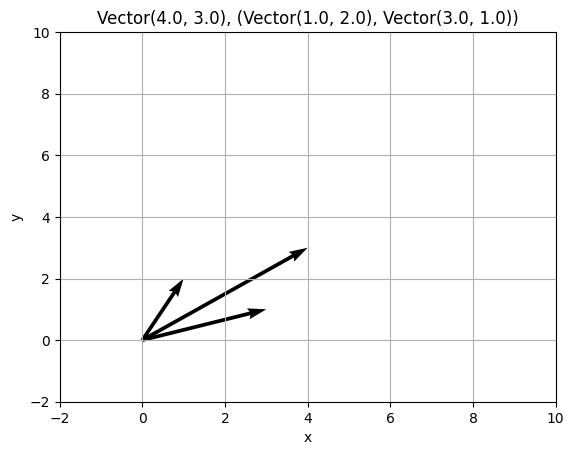

In [38]:
v1 = Vector(1,2)
v2 = Vector(3,1)
v3 = v1+v2

v3.plot(v1, v2)

In [28]:
gen1 = (i for i in range(10))
print(gen1)
Vector(*gen1)

gen = (i for i in range(10))

print(gen)
print(*gen)

<generator object <genexpr> at 0x00000200909C5CF0>
<generator object <genexpr> at 0x00000200909C5B30>
0 1 2 3 4 5 6 7 8 9


In [12]:
def fun(a,b,c,d):
    print(a,b,c,d)

mylist = [1,2,3,4]

fun(*mylist) #måste unpacka, funkar inte annars.

1 2 3 4


In [ ]:

Vector(1,2)+Vector(3,4,2)

In [ ]:
print(f"{v2=}, {v3=}")
print(v2.__add__(v3))
v3+v2


In [ ]:
v2-v3

In [ ]:
v2+Vector(1,2,3)

In [14]:
gen = (i for i in range(10))
print(gen)
Vector(*gen)

<generator object <genexpr> at 0x000002009095D3C0>


Vector(0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0)

In [ ]:
isinstance(fish1, Fish), isinstance(fish1, Fox), isinstance(5, int)

In [30]:
len(v2), len(v1)

(2, 3)

In [31]:
def f(x1,x2,x3):
    print(x1,x2,x3)

f(1,2,3)
try:
    f([1,2,3])
except TypeError as err:
    print(err)

f(*[1,2,3])

f(*["hej",Vector(1,2), -5])
f("hej",Vector(1,2), -5)

f(*[*["hej", "då"],Vector(1,2)])

1 2 3
f() missing 2 required positional arguments: 'x2' and 'x3'
1 2 3
hej Vector(1.0, 2.0) -5
hej Vector(1.0, 2.0) -5
hej då Vector(1.0, 2.0)
